# Where's the money go? 

The previous notebook established a relationship between production budgets, revenue generation, and return on investment. Now we hope to look into what factors affect these variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set(style="ticks")

In [2]:
#import data and clean column names:
big_chungus = pd.read_csv('../etl_csvs/chungus_with_tmdb.csv')
big_chungus.columns = ['Unnamed: 0', 'tconst', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes',
       'averagerating', 'numvotes', 'Crime', 'War', 'Adventure', 'Biography',
       'n/a', 'News', 'Sci-Fi', 'Animation', 'Fantasy', 'Short', 'Talk-Show',
       'Thriller', 'Family', 'History', 'Horror', 'Drama', 'Reality-TV',
       'Romance', 'Music', 'Action', 'Musical', 'Western', 'Game-Show',
       'Mystery', 'Sport', 'Comedy', 'Documentary', 'Adult', 'director_1',
       'director_2', 'director_3', 'writer_1', 'writer_2', 'writer_3',
       'production_budget', 'domestic_gross', 'worldwide_gross',
       'release_date', 'genre_ids', 'id', 'original_language',
       'original_title_tmdb', 'popularity', 'release_date_tmdb', 'title',
       'vote_average', 'vote_count']
big_chungus.columns

Index(['Unnamed: 0', 'tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'averagerating', 'numvotes', 'Crime', 'War',
       'Adventure', 'Biography', 'n/a', 'News', 'Sci-Fi', 'Animation',
       'Fantasy', 'Short', 'Talk-Show', 'Thriller', 'Family', 'History',
       'Horror', 'Drama', 'Reality-TV', 'Romance', 'Music', 'Action',
       'Musical', 'Western', 'Game-Show', 'Mystery', 'Sport', 'Comedy',
       'Documentary', 'Adult', 'director_1', 'director_2', 'director_3',
       'writer_1', 'writer_2', 'writer_3', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'release_date', 'genre_ids', 'id',
       'original_language', 'original_title_tmdb', 'popularity',
       'release_date_tmdb', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [3]:
#Extract useful columns
pop_chungus = big_chungus[['tconst','primary_title', 'release_date',
    'domestic_gross', 'worldwide_gross','production_budget',
    'averagerating', 'runtime_minutes','popularity','director_1', 'writer_1',
    'Crime', 'War','Adventure', 'Biography', 'n/a', 'News', 'Sci-Fi', 
    'Animation','Fantasy', 'Short', 'Talk-Show', 'Thriller', 'Family',
    'History', 'Horror', 'Drama', 'Reality-TV', 'Romance', 'Music', 'Action',
    'Musical', 'Western', 'Game-Show', 'Mystery', 'Sport', 'Comedy',
    'Documentary', 'Adult']]
pop_chungus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146439 entries, 0 to 146438
Data columns (total 39 columns):
tconst               146439 non-null object
primary_title        146439 non-null object
release_date         3950 non-null object
domestic_gross       3950 non-null float64
worldwide_gross      3950 non-null float64
production_budget    3950 non-null float64
averagerating        74036 non-null float64
runtime_minutes      114651 non-null float64
popularity           19272 non-null float64
director_1           140691 non-null object
writer_1             110488 non-null object
Crime                146439 non-null float64
War                  146439 non-null float64
Adventure            146439 non-null float64
Biography            146439 non-null float64
n/a                  146439 non-null float64
News                 146439 non-null float64
Sci-Fi               146439 non-null float64
Animation            146439 non-null float64
Fantasy              146439 non-null float64
Shor

## This sheet will eventually get into discovering which genres of film are most popular but first let's establish the relationship between popularity and revenue:

### Now we have our modules and data imported let's build the table we want to work with:

In [4]:
money_chungus = pop_chungus[['popularity','domestic_gross', 'worldwide_gross', 'production_budget']]
money_chungus['worldwide_roi'] = (money_chungus['worldwide_gross']-money_chungus['production_budget'])/money_chungus['production_budget']

/Users/elliotevins/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Clean it up a bit to dron Nan values:

In [5]:
money_chungus.dropna(subset=['popularity'], inplace=True)
money_chungus.dropna(subset=['worldwide_gross'], inplace=True)
money_chungus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3051 entries, 20 to 146373
Data columns (total 5 columns):
popularity           3051 non-null float64
domestic_gross       3051 non-null float64
worldwide_gross      3051 non-null float64
production_budget    3051 non-null float64
worldwide_roi        3051 non-null float64
dtypes: float64(5)
memory usage: 143.0 KB


/Users/elliotevins/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/elliotevins/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
# Looks good - now let's set a new table that standardizes the units between popularity and gross revenue:
normalized = money_chungus[['popularity','worldwide_gross']]
normalized['simple_popularity'] = normalized['popularity']/10
normalized['simple_gross'] = normalized['worldwide_gross']/1_000_000

/Users/elliotevins/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/elliotevins/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


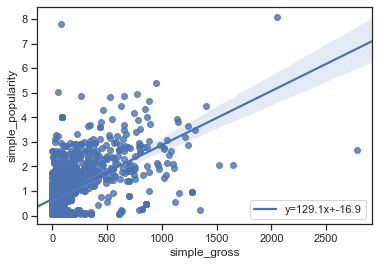

R-Value = 0.5334513839013165
P-Value = 5.243716819201738e-224


In [7]:
# No let's see how strong the connection is between popularity and revenue generation
slope, intercept, r_value, p_value, std_err = stats.linregress(normalized['simple_popularity'],normalized['simple_gross'])
ax = sns.regplot(x="simple_gross", y="simple_popularity", data=normalized, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()
print(f'R-Value = {r_value}')
print(f'P-Value = {p_value}')

Okay, we can see that there is a statistically significant connection between worldwide revenue and popularity. Now we can ask what kinds of movies are most popular? 

# Let's look at Genre as an indicator of popularity and revenue:

In [8]:
#Let's call back on pop_chungus df and check for correlation between genres and worldwide gross
col = 'worldwide_gross'
cols = ['Crime', 'War', 'Adventure', 'Biography', 'News', 'Sci-Fi', 'Animation',
        'Fantasy', 'Thriller', 'Family', 'History', 'Horror', 'Drama', 
        'Reality-TV', 'Romance', 'Music', 'Action', 'Western', 
        'Mystery', 'Sport', 'Comedy', 'Documentary', col]
dft = pop_chungus[cols]
df_corr = dft.corr().unstack().reset_index(name='corr')
df_gross_corr = df_corr.sort_values('corr', ascending=False)[(df_corr['level_0'] == col) & (df_corr['level_1'] != col)]
df_gross_corr

/Users/elliotevins/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,level_0,level_1,corr
508,worldwide_gross,Adventure,0.385612
522,worldwide_gross,Action,0.217526
512,worldwide_gross,Animation,0.217247
511,worldwide_gross,Sci-Fi,0.167770
513,worldwide_gross,Fantasy,0.122174
515,worldwide_gross,Family,0.042218
526,worldwide_gross,Comedy,0.032673
519,worldwide_gross,Reality-TV,-0.007777
510,worldwide_gross,News,-0.010602
523,worldwide_gross,Western,-0.014542


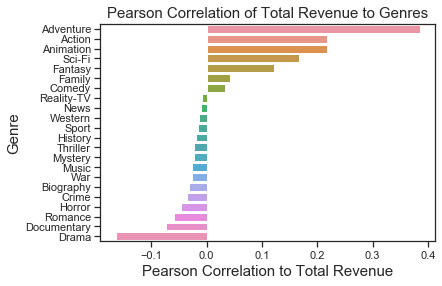

In [9]:
#Definitely some correlation, let's check this out visually:
sns.barplot(x="corr", y="level_1", data=df_gross_corr)
plt.title('Pearson Correlation of Total Revenue to Genres', fontsize=15)
plt.xlabel("Pearson Correlation to Total Revenue", fontsize=15)
plt.ylabel("Genre", fontsize=15);

In [10]:
#Now let's convert this to a percentage schedule Microsoft can follow: 
df_gross_corr['percentage_schedule'] =(((df_gross_corr['corr'] + 0.164351962)*100)/4.23).round(1)
percentage_schedule = df_gross_corr[['level_1', 'percentage_schedule']]
percentage_schedule

,level_1,percentage_schedule
508,Adventure,13.0
522,Action,9.0
512,Animation,9.0
511,Sci-Fi,7.9
513,Fantasy,6.8
515,Family,4.9
526,Comedy,4.7
519,Reality-TV,3.7
510,News,3.6
523,Western,3.5


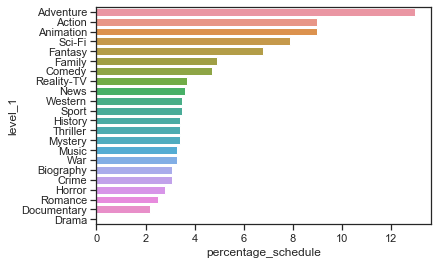

In [11]:
sns.barplot(df_gross_corr['percentage_schedule'],df_gross_corr['level_1'] )

### Look's great, now we have some information on which genres Microsoft should produce and at what rates to maximize revenue. 

In [12]:
#Now let's see the same comparison in an attempt to maximize popularity.
col1 = 'popularity'
cols1 = ['Crime', 'War', 'Adventure', 'Biography', 'News', 'Sci-Fi', 'Animation',
        'Fantasy', 'Short', 'Talk-Show', 'Thriller', 'Family', 'History', 'Horror', 'Drama', 
        'Reality-TV', 'Romance', 'Music', 'Action', 'Musical', 'Western', 'Game-Show', 
        'Mystery', 'Sport', 'Comedy', 'Documentary', 'Adult', col1]
dft1 = pop_chungus[cols1]
df_corr = dft1.corr().unstack().reset_index(name='corr')
# df_corr.sort_values('corr', ascending=False)[(df_corr['corr'] < .9) & (df_corr['corr'] > .5)]
df_pop_corr = df_corr.sort_values('corr', ascending=False)[(df_corr['level_0'] == col1) & (df_corr['level_1'] != col1)]
df_pop_corr.to_csv('../pop_corr.csv')

/Users/elliotevins/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


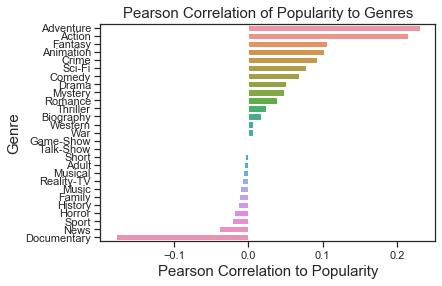

In [13]:
sns.barplot(x="corr", y="level_1", data=df_pop_corr)
plt.title('Pearson Correlation of Popularity to Genres', fontsize=15)
plt.xlabel("Pearson Correlation to Popularity", fontsize=15)
plt.ylabel("Genre", fontsize=15);

In [14]:
df_pop_corr['percentage_schedule'] =(((df_pop_corr['corr'] + 0.17838858571255600)*100)/5.57720769551642000).round(1)

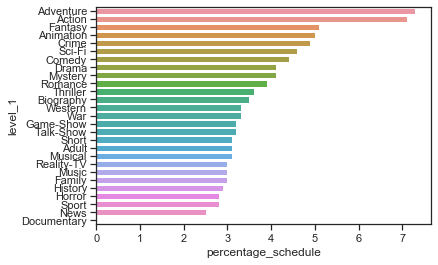

In [15]:
sns.barplot(df_pop_corr['percentage_schedule'],df_pop_corr['level_1'] )